In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from parse_input_file import parse_file, read_file, parse_signals
from create_feature_dfs import compose_signals_df, create_initial_input

from MA import moving_average
from PACF import PACF

In [2]:
READ_FROM_FILE_TEST = False
FILE_PATH_FROM_DATA = 'Data/rts1.txt'

In [3]:
if READ_FROM_FILE_TEST:
    parsing_result = parse_file('Test+')
    
    a_coefs = [parsing_result['out_weights'][i] for i in parsing_result['out_weights'].keys()]
    b_coefs = [parsing_result['manage_weights'][i] for i in parsing_result['manage_weights'].keys()]
else:
    a_coefs = [0,0.15,-0.33,0.25]
    b_coefs = [1,0.3,0.7,0.]
    
    if FILE_PATH_FROM_DATA:
        manage_signal = parse_signals(read_file(FILE_PATH_FROM_DATA))
        parsing_result = create_initial_input(a_coefs, b_coefs, uniform_low=0, uniform_high=100, time_series_shape=100, noise_std=1, 
                                              manage=manage_signal)
    else:
        parsing_result = create_initial_input(a_coefs, b_coefs, uniform_low=0, uniform_high=100, time_series_shape=100, noise_std=1)

In [4]:
features_dfs = compose_signals_df(parsing_result)

features_dfs.head()

,y(k),y(k-1),y(k-2),y(k-3),v(k),v(k-1),v(k-2),v(k-3)
0,2471.558776,2313.610545,2304.909865,2297.141676,2339.79,2313.90,2306.87,2296.56
1,2505.902200,2471.558776,2313.610545,2304.909865,2330.87,2339.79,2313.90,2306.87
2,2476.034603,2505.902200,2471.558776,2313.610545,2225.46,2330.87,2339.79,2313.90
3,2460.684188,2476.034603,2505.902200,2471.558776,2174.78,2225.46,2330.87,2339.79
4,2391.143202,2460.684188,2476.034603,2505.902200,2159.10,2174.78,2225.46,2330.87


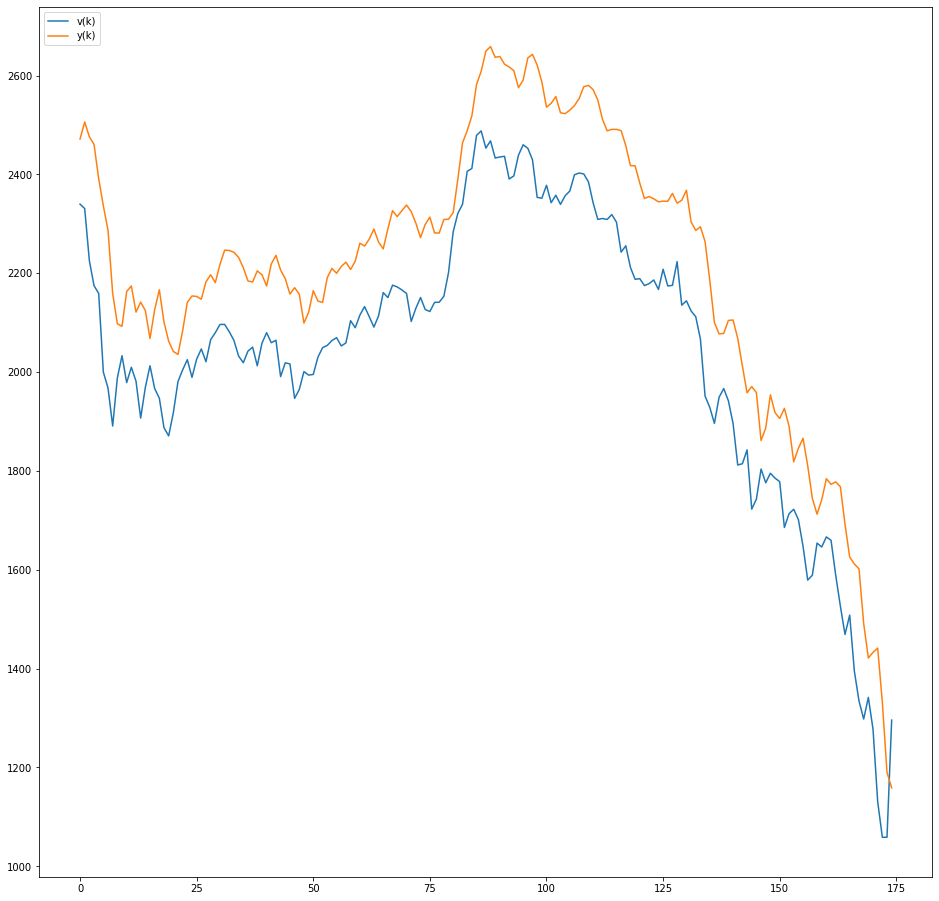

In [5]:
plt.figure(figsize=(16,16))

features_dfs['''v(k)'''].plot(label='''v(k)''')
features_dfs['''y(k)'''].plot(label='''y(k)''')

plt.legend(loc='upper left')
plt.show()

# Moving average

In [6]:
moving_avarege_result = moving_average(features_dfs['''y(k)'''], n=5)
exponential_ma_result = moving_average(features_dfs['''y(k)'''], n=5, weights='exp')
exp_smoothed_ma_result = moving_average(features_dfs['''y(k)'''], n=5, weights='exp_smoothed')

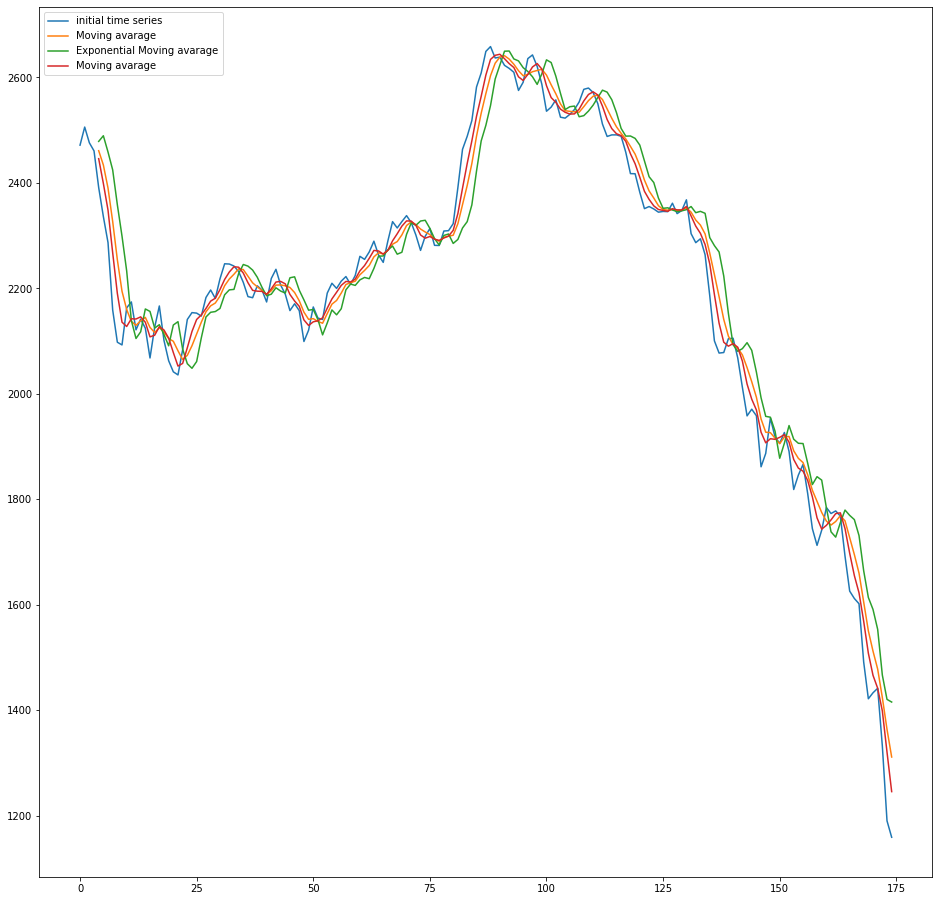

In [7]:
plt.figure(figsize=(16,16))

plt.plot(features_dfs['''y(k)'''], label='initial time series')
plt.plot(range(4,features_dfs.shape[0]),moving_avarege_result, label='Moving avarage')
plt.plot(range(4,features_dfs.shape[0]),exponential_ma_result, label='Exponential Moving avarage')
plt.plot(range(4,features_dfs.shape[0]),exp_smoothed_ma_result, label='Moving avarage')

plt.legend(loc='upper left')
plt.show()

# Patial Auto Correlation Function

In [8]:
pacf_object = PACF(features_dfs['''y(k)'''])
pacf_results = [pacf_object.simmetric_F(i) for i in range(10)]

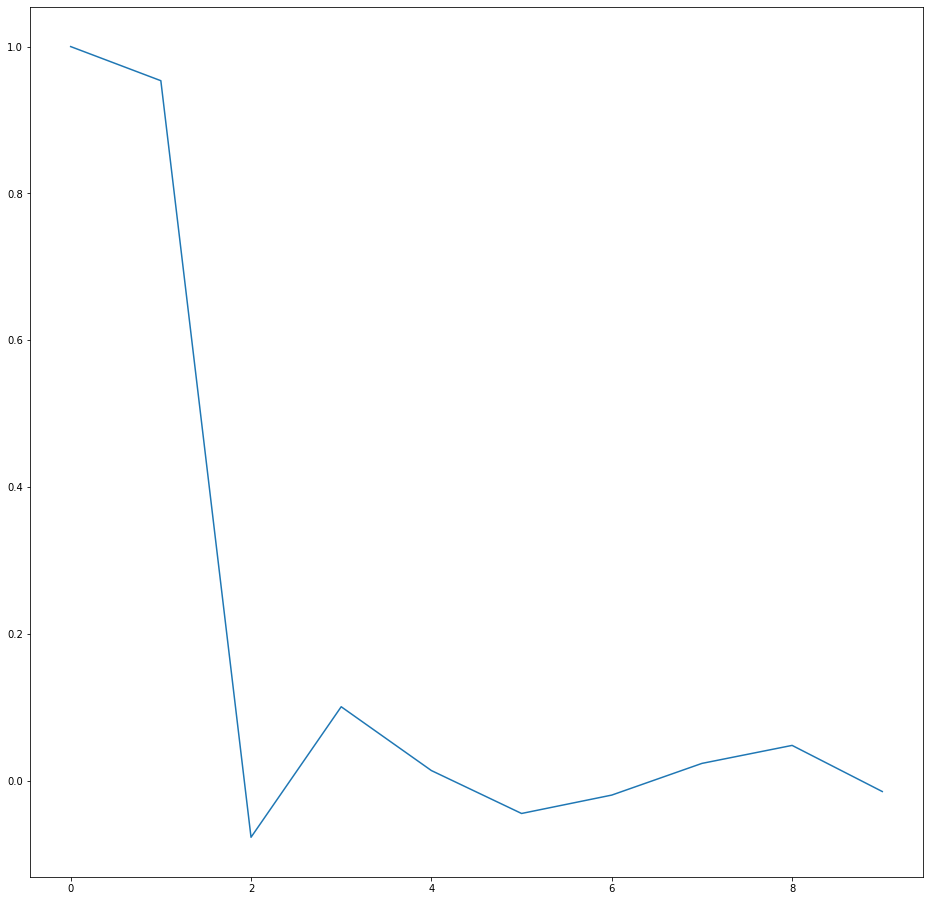

In [10]:
plt.figure(figsize=(16,16))

plt.plot(pacf_results);